# LIDA - Automatic Generation of Visualizations and Infographics using Large Language Models

LIDA is a library for generating data visualizations and data-faithful infographics. LIDA is grammar agnostic (will work with any programming language and visualization libraries e.g. matplotlib, seaborn, altair, d3 etc) and works with multiple large language model providers (OpenAI, PaLM, Cohere, Huggingface). Details on the components of LIDA are described in the [paper here](https://arxiv.org/abs/2303.02927) and in this tutorial [notebook](notebooks/tutorial.ipynb). See the project page [here](https://microsoft.github.io/lida/) for updates!.



## Getting Started | Installation

```bash 
pip install -U lida
```

If you intend to use lida with local huggingface models, you will need to install the `transformers` library. 

```bash
pip install lida[transformers]
```

## The LIDA Python API

Lida offers a manager class that exposes core functionality of the LIDA system. This tutorial will show you how to use the manager class to create visualizations based on a dataset.

### Multiple LLM Backends
LIDA supports multiple LLM backends such as `openai`, `cohere`, `palm`, `huggingface` etc. You can switch between backends by setting the `text_gen` parameter in the `Manager` class. By default, LIDA uses the `openai` backend. For a list of supported models and how to configure them, see the [llmx documentation](https://github.com/victordibia/llmx).

```python

from lida import llm

text_gen = llm("openai") # for openai
text_gen = llm(provider="openai", api_type="azure", azure_endpoint=os.environ["AZURE_OPENAI_BASE"], api_key=os.environ["AZURE_OPENAI_API_KEY"],    api_version="2023-07-01-preview") # for azure openai
text_gen = llm("cohere") # for cohere
text_gen = llm("palm") # for palm
text_gen = llm(provider="hf", model="uukuguy/speechless-llama2-hermes-orca-platypus-13b", device_map="auto")

lida = Manager(text_gen=text_gen)
```

Note that you can set your llm keys as follows

```bash
export OPENAI_API_KEY=<your key>
export COHERE_API_KEY=<your key>
# for PaLM
export PALM_SERVICE_ACCOUNT_KEY_FILE=<path to gcp service account key file>
export PALM_PROJECT_ID=<your gcp project id>
```
#### Azure OpenAI
```python
from llmx import  llm, TextGenerationConfig
import os 

text_gen = llm(
    provider="openai",
    api_type="azure",
    azure_endpoint=os.environ["AZURE_OPENAI_BASE"],
    api_key=os.environ["AZURE_OPENAI_API_KEY"],
    api_version="2023-07-01-preview",
)
lida = Manager(text_gen=text_gen)
```


### Summarization Methods 
The summarizer module works takes an `summary_method` argument which determines if the base summary is enriched by an LLM. By default, the `summary_method` argument is set to `default` for a base summary (statistics etc). Set it to `llm` to enrich/annotate the base summary with an llm.

### Caching 
Each manager method takes a [`textgen_config`](https://github.com/victordibia/llmx/blob/7c0fc093d1b8780ebebc7e080f5c63991514038b/llmx/datamodel.py#L22C10-L22C10) argument which is a dictionary that can be used to configure the text generation process (with parameters for model, temperature, max_tokens, topk etc). One of the keys in this dictionary is `use_cache`. If set to `True`, the manager will cache the generated text associated with that method. Use for speedup and to avoid hitting API limits.


In [ ]:
# !pip install -U lida 
# !pip install lida[infographics] # for infographics support

In [1]:
from lida import Manager, TextGenerationConfig , llm  

## Summarize Data, Generate Goals

In [3]:
# lida = Manager(text_gen = llm("openai", api_key=None)) # !! api key
# textgen_config = TextGenerationConfig(n=1, temperature=0.5, model="gpt-3.5-turbo-0301", use_cache=True)

# summary = lida.summarize("https://raw.githubusercontent.com/uwdata/draco/master/data/cars.csv", summary_method="default", textgen_config=textgen_config)  
# goals = lida.goals(summary, n=2, textgen_config=textgen_config)

# for goal in goals:
#     display(goal)

lida = Manager(text_gen = llm(
    provider="openai",
    api_type="azure",
    azure_endpoint="https://jeffrey-openai-eastus.openai.azure.com/",
    api_key="26c454a33fca450894ad90cd6374c52d",
    api_version="2024-02-01",)) # !! api key
textgen_config = TextGenerationConfig(n=1, temperature=0.5, model="gpt4o", use_cache=True)

summary = lida.summarize("data\THL实时数据POC - In Queue Per Minute.xlsx", summary_method="default", textgen_config=textgen_config)
print(summary)
goals = lida.goals(summary, n=2, textgen_config=textgen_config)

for goal in goals:
    display(goal)

{'name': 'data\\THL实时数据POC - In Queue Per Minute.xlsx', 'file_name': 'data\\THL实时数据POC - In Queue Per Minute.xlsx', 'dataset_description': '', 'fields': [{'column': 'BU', 'properties': {'dtype': 'category', 'samples': ['THL'], 'num_unique_values': 1, 'semantic_type': '', 'description': ''}}, {'column': 'DATA_TIME', 'properties': {'dtype': 'date', 'min': Timestamp('2024-06-06 00:01:00'), 'max': Timestamp('2024-06-08 00:00:00'), 'samples': [Timestamp('2024-06-06 14:06:00')], 'num_unique_values': 2553, 'semantic_type': '', 'description': ''}}, {'column': 'QUEUES_NAME', 'properties': {'dtype': 'category', 'samples': ['WhatsAppQueue'], 'num_unique_values': 3, 'semantic_type': '', 'description': ''}}, {'column': 'CONTACTS_IN_QUEUE', 'properties': {'dtype': 'int64', 'samples': [1], 'num_unique_values': 5, 'semantic_type': '', 'description': ''}}], 'field_names': ['BU', 'DATA_TIME', 'QUEUES_NAME', 'CONTACTS_IN_QUEUE']}



### Goal 0
---
**Question:** How does the number of contacts in queue vary over time for each queue?

**Visualization:** `line chart with 'DATA_TIME' on the x-axis and 'CONTACTS_IN_QUEUE' on the y-axis, with separate lines for each 'QUEUES_NAME'`

**Rationale:** This visualization will help us understand the temporal trends and variations in the number of contacts in the queue for each queue type. By plotting 'DATA_TIME' against 'CONTACTS_IN_QUEUE' and differentiating by 'QUEUES_NAME', we can identify peak times and potential bottlenecks in the queue management.



### Goal 1
---
**Question:** What is the average number of contacts in queue for each queue type?

**Visualization:** `bar chart with 'QUEUES_NAME' on the x-axis and the average 'CONTACTS_IN_QUEUE' on the y-axis`

**Rationale:** This visualization will provide insights into the overall load on each queue type by showing the average number of contacts in the queue. By using 'QUEUES_NAME' and calculating the average 'CONTACTS_IN_QUEUE', we can identify which queues are consistently busier and may require additional resources.


In [4]:
# goals can also be based on a persona 
persona = "a mechanic who wants to buy a car that is cheap but has good gas mileage"
personal_goals = lida.goals(summary, n=2, persona=persona, textgen_config=textgen_config)
for goal in personal_goals:
    display(goal)


### Goal 0
---
**Question:** What is the trend of contacts in queue over time for each queue?

**Visualization:** `line chart of DATA_TIME vs. CONTACTS_IN_QUEUE, color-coded by QUEUES_NAME`

**Rationale:** This visualization will show how the number of contacts in queue changes over time for each queue (QUEUES_NAME). By plotting DATA_TIME on the x-axis and CONTACTS_IN_QUEUE on the y-axis, and using different colors for each QUEUES_NAME, we can identify patterns and peak times for queue congestion. This is crucial for understanding operational loads and planning resource allocation.



### Goal 1
---
**Question:** What are the average contacts in queue for each queue?

**Visualization:** `bar chart of QUEUES_NAME vs. average CONTACTS_IN_QUEUE`

**Rationale:** A bar chart showing the average number of contacts in each queue (QUEUES_NAME) will provide a clear comparison of how busy each queue is on average. This can help in identifying which queues require more attention or resources to manage effectively.


## Generate Visualizations

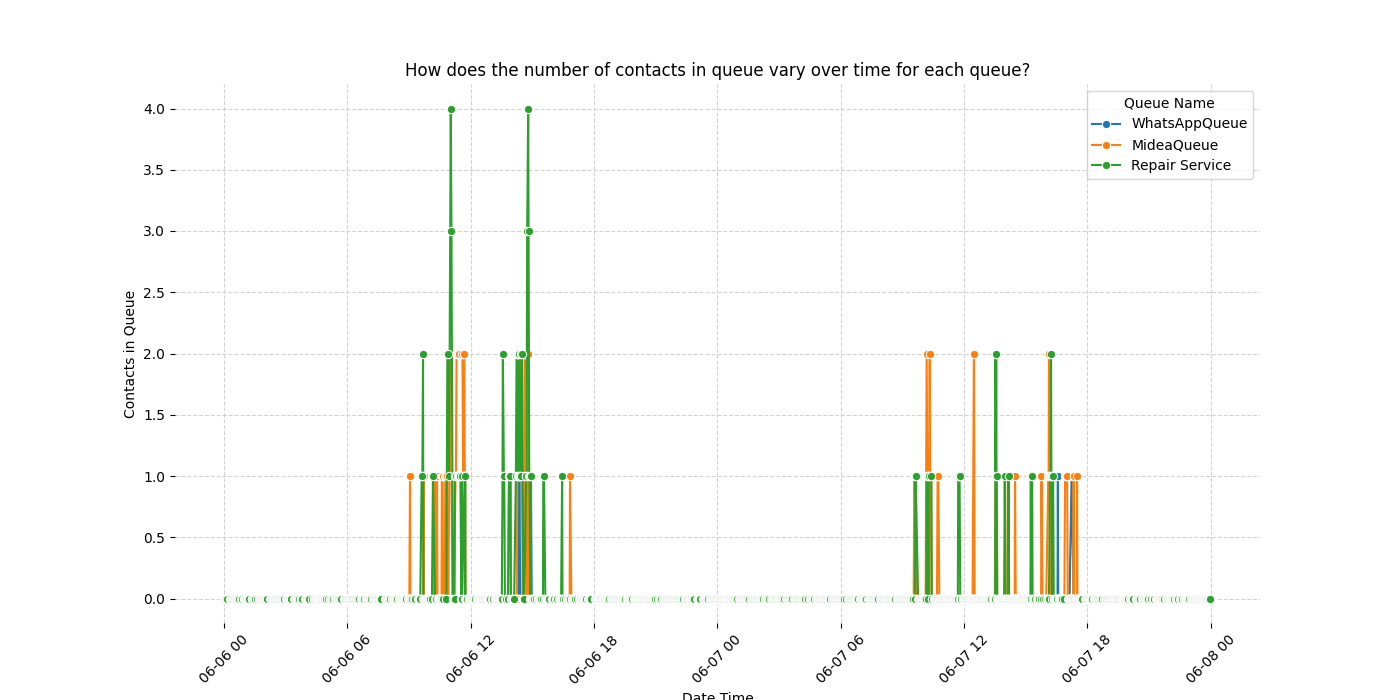

In [5]:
i = 0
library = "seaborn"
textgen_config = TextGenerationConfig(n=1, temperature=0.2, use_cache=True)
charts = lida.visualize(summary=summary, goal=goals[i], textgen_config=textgen_config, library=library)  
charts[0]

### Generate visualization via a "user query"   

<string>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


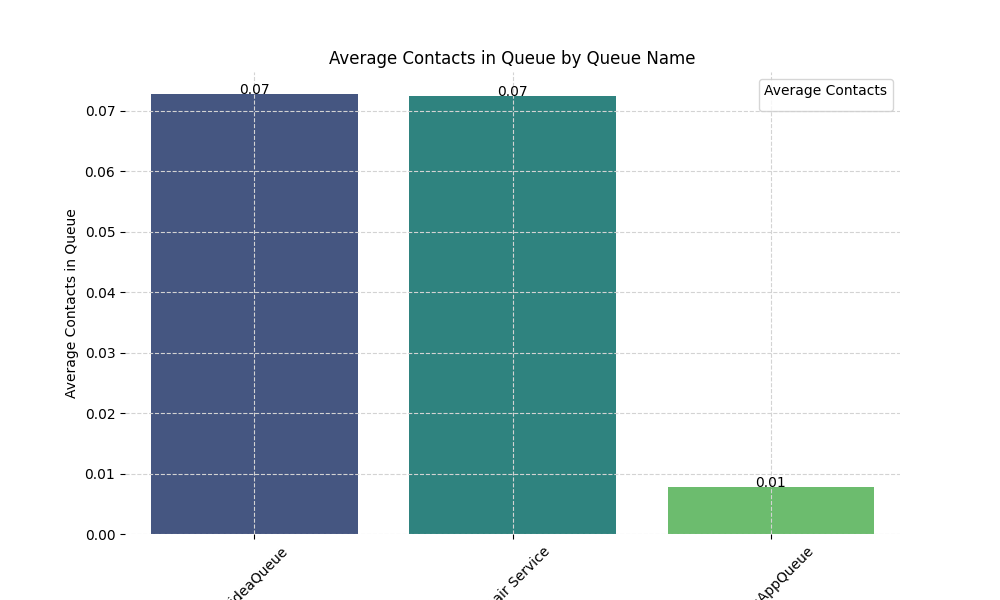

In [6]:
user_query = "What is the average price of cars by type?"
textgen_config = TextGenerationConfig(n=1, temperature=0.2, use_cache=True)
charts = lida.visualize(summary=summary, goal=user_query, textgen_config=textgen_config)  
charts[0]

# VizOps

Given that LIDA represents visualizations as code,
the VISGENERATOR also implements submodules
to perform operations on this representation. 

This includes 
- **Natural language based visualization refinement**: Provides a conversational api to iteratively
4Execution in a sandbox environment is recommended.
refine generated code (e.g., translate chart t hindi
. . . zoom in by 50% etc) which can then be executed to generate new visualizations.
- **Visualization explanations and accessibility**:
Generates natural language explanations (valuable
for debugging and sensemaking) as well as accessibility descriptions (valuable for supporting users
with visual impairments).

- **Visualization code self-evaluation and repair**:
Applies an LLM to self-evaluate generated code on
multiple dimensions (see section 4.1.2).

- **Visualization recommendation**: Given some context (goals, or an existing visualization), recommend additional visualizations to the user (e.g., for
comparison, or to provide additional perspectives).



## Natural language based visualization refinement 

Given some code, modify it based on natural language instructions. This yields a new code snippet that can be executed to generate a new visualization.

In [ ]:
code = charts[0].code
textgen_config = TextGenerationConfig(n=1, temperature=0, use_cache=True)
instructions = ["make the chart height and width equal", "change the color of the chart to red", "translate the chart to spanish"]
edited_charts = lida.edit(code=code,  summary=summary, instructions=instructions, library=library, textgen_config=textgen_config)
edited_charts[0]

## Visualization explanations and accessibility

In [ ]:
explanations = lida.explain(code=code, library=library, textgen_config=textgen_config) 
for row in explanations[0]:
    print(row["section"]," ** ", row["explanation"])

## Visualization code self-evaluation and repair

In [ ]:
evaluations = lida.evaluate(code=code,  goal=goals[i], textgen_config=textgen_config, library=library)[0] 
for eval in evaluations:
    print(eval["dimension"], "Score" ,eval["score"], "/ 10")
    print("\t", eval["rationale"][:200])
    print("\t**********************************")

## Visualization Recommendation

In [ ]:
textgen_config = TextGenerationConfig(n=2, temperature=0.2, use_cache=True)
recommended_charts =  lida.recommend(code=code, summary=summary, n=2,  textgen_config=textgen_config)

In [ ]:
print(f"Recommended {len(recommended_charts)} charts")
for chart in recommended_charts:
    display(chart) 

## Infographics (Beta)

- Explores using LIDA to generate infographics from an existing visualization 
- Uses the `peacasso` package, and loads open source stable diffusion models 
- You will need to run `pip install lida[infographics]` to install the required dependencies.
- Currently work in progress (work being done to post process infographics with chart axis and title overlays from the original visualization, add presets for different infographic styles, and add more stable diffusion models)


In [ ]:
# !pip install lida[infographics] 
# ensure you have a GPU runtime

In [ ]:
infographics = lida.infographics(visualization = edited_charts[0].raster, n=1, style_prompt="pastel art, green pearly rain drops, highly detailed, no blur, white background")

In [ ]:
from lida.utils import plot_raster
plot_raster([edited_charts[0].raster, infographics["images"][0]]) 